In [2]:
# Generates the Lorenz 1963 and the Lorenz 1996 chaotic systems.

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [ ]:
def RK_4(N, h, M, func):

    # Generate time array.
    t = np.arange(0., N * h, h)
    # Wwights for each Runge Kutta steps.
    w = np.array( [1, 1, 1, 2] )
    # Initial conditions.
    x_0 = np.array( [0.01] * M )
    # Runge Kutta steps array.
    X = np.array( [ [0.] * (w.shape[0] + 1) ] * M )
    # Results array.
    x = np.array( [ ( [i] + [0.0] * (N - 1) ) for i in x_0 ] )

    # Iterate for every time step.
    for i in range(N - 1):
        # Iterate for each Runge Kutta step.
        for j in range(w.shape[0]):
            # Generate the input variable for the Runge Kutta step.
            x_t = np.array( [x[k, i] + h * X[k, j] * w[j] / 2 for k in range(M)] )
            # Calculate the Runge Kutta step.
            X[:, j + 1] = Lorenz_63(x_t[0], x_t[1], x_t[2])

    # Generate the result.
    x[:, i + 1] = ( x[:, i] + h / 6 * ( X[:, 1]
        + 2 * X[:, 2] + 2 * X[:, 3] + X[:, 4] ) )

In [ ]:
def Lorenz_63(x, y, z, s = 10., r = 28., b = 8/3):
    dx_dt = s * ( y - x )
    dy_dt = x * ( r - z ) - y
    dz_dt = x * y - b * z

    return dx_dt, dy_dt, dz_dt

In [ ]:
# Iterate for every time step.
for i in range(N - 1):
    # Iterate for each Runge Kutta step.
    for j in range(w.shape[0]):
        # Generate the input variable for the Runge Kutta step.
        x_t = np.array( [x[k, i] + h * X[k, j] * w[j] / 2 for k in range(M)] )
        # Calculate the Runge Kutta step.
        X[0, j + 1] = s * ( x_t[1] - x_t[0] )
        X[1, j + 1] = x_t[0] * ( r - x_t[2] ) - x_t[1]
        X[2, j + 1] = x_t[1] * x_t[0] - b * x_t[2]

    # Generate the result.
    x[:, i + 1] = ( x[:, i] + h / 6 * ( X[:, 1]
        + 2 * X[:, 2] + 2 * X[:, 3] + X[:, 4] ) )

In [ ]:
# Iterate for every time step.
for i in range(N - 1):
    # Iterate for each Runge Kutta step.
    for j in range(w.shape[0]):
        # Generate the input variable for the Runge Kutta step.
        x_t = np.array ( [x[k, i] + h * X[k, j] * w[j] / 2 for k in range(M)] )
        # Calculate the Runge Kutta step.
        X[:, j + 1] = ( ( np.roll(x_t, -1) - np.roll(x_t, 2) )
            * np.roll(x_t, 1) - x_t + F )

    # Generate the result.
    x[:, i + 1] = ( x[:, i] + h / 6 * ( X[:, 1]
        + 2 * X[:, 2] + 2 * X[:, 3] + X[:, 4] ) )

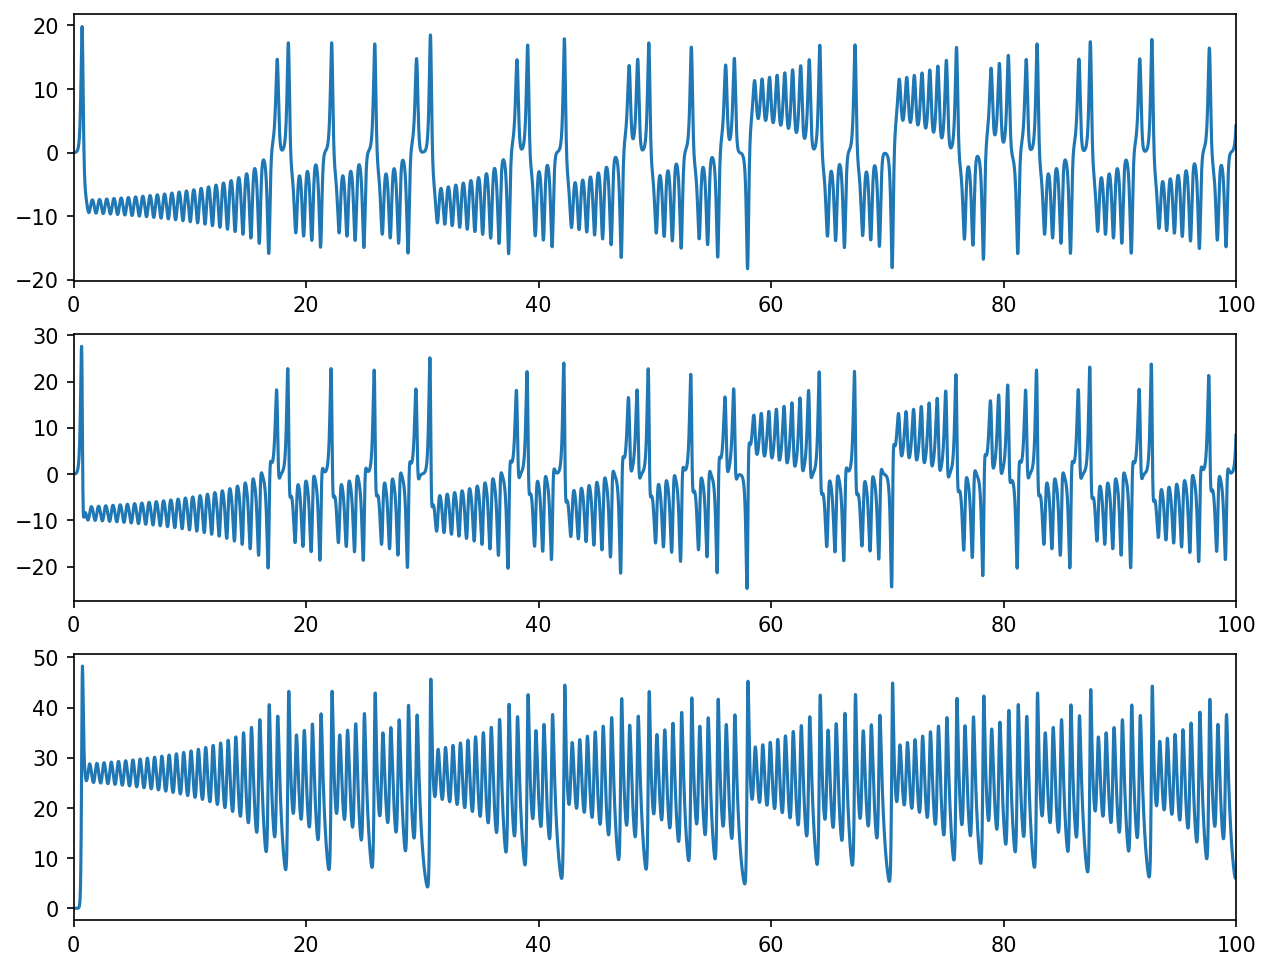

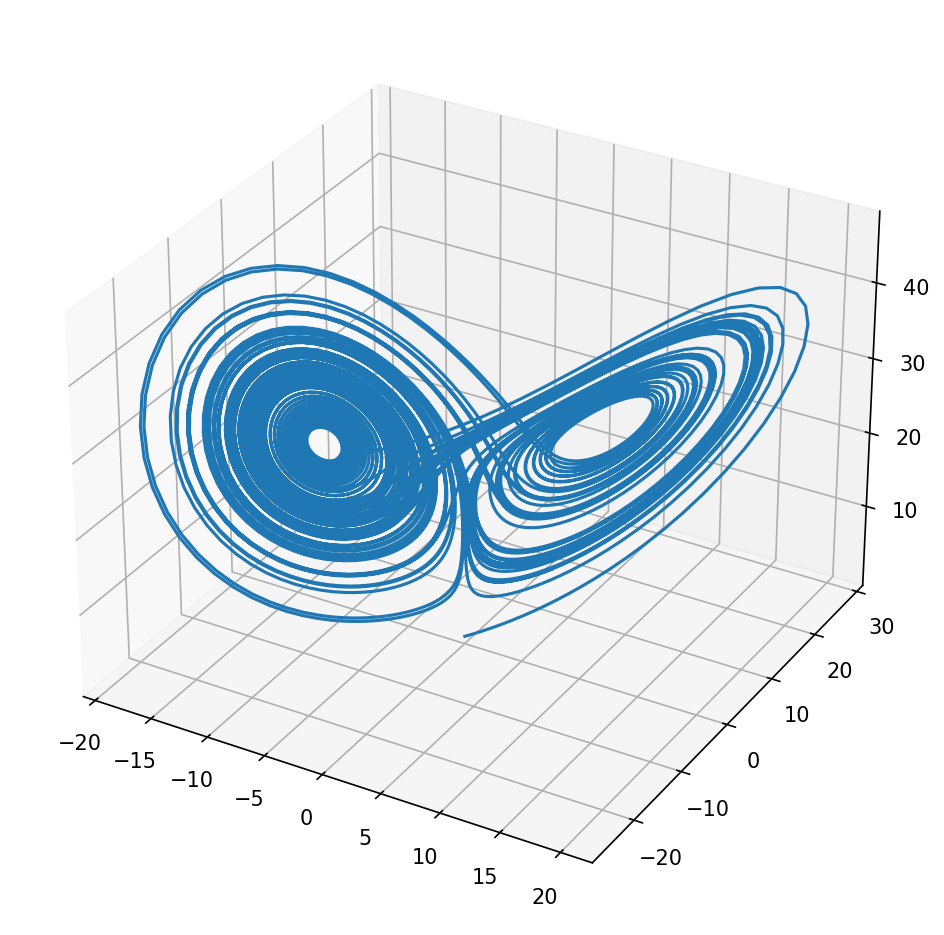

In [10]:
# Lorenz 1963

# Number of variables.
M = 3
# Number of iterations.
N = int(1e4)
# Time step.
h = 0.01
# Constants.
s, r, b = 10., 28, 8/3.

# Generate time array.
t = np.arange(0., N * h, h)
# Wwights for each Runge Kutta steps.
w = np.array( [1, 1, 1, 2] )
# Initial conditions.
x_0 = np.array( [0.01] * M )
# Runge Kutta steps array.
X = np.array( [ [0.] * (w.shape[0] + 1) ] * M )
# Results array.
x = np.array( [ ( [i] + [0.0] * (N - 1) ) for i in x_0 ] )

# Iterate for every time step.
for i in range(N - 1):
    # Iterate for each Runge Kutta step.
    for j in range(w.shape[0]):
        # Generate the input variable for the Runge Kutta step.
        x_t = np.array( [x[k, i] + h * X[k, j] * w[j] / 2 for k in range(M)] )
        # Calculate the Runge Kutta step.
        X[0, j + 1] = s * ( x_t[1] - x_t[0] )
        X[1, j + 1] = x_t[0] * ( r - x_t[2] ) - x_t[1]
        X[2, j + 1] = x_t[1] * x_t[0] - b * x_t[2]

    # Generate the result.
    x[:, i + 1] = ( x[:, i] + h / 6 * ( X[:, 1]
        + 2 * X[:, 2] + 2 * X[:, 3] + X[:, 4] ) )

# Plot
fig, axes = plt.subplots(M)
fig.set_facecolor("w")
fig.set_size_inches(10, 8)
fig.set_dpi(150)

for i in range(M):
    axes[i].plot(t, x[i])
    axes[i].set_xlim(0, h * N)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_facecolor("w")
fig.set_size_inches(10, 8)
fig.set_dpi(150)

ax.plot(x[0], x[1], x[2])

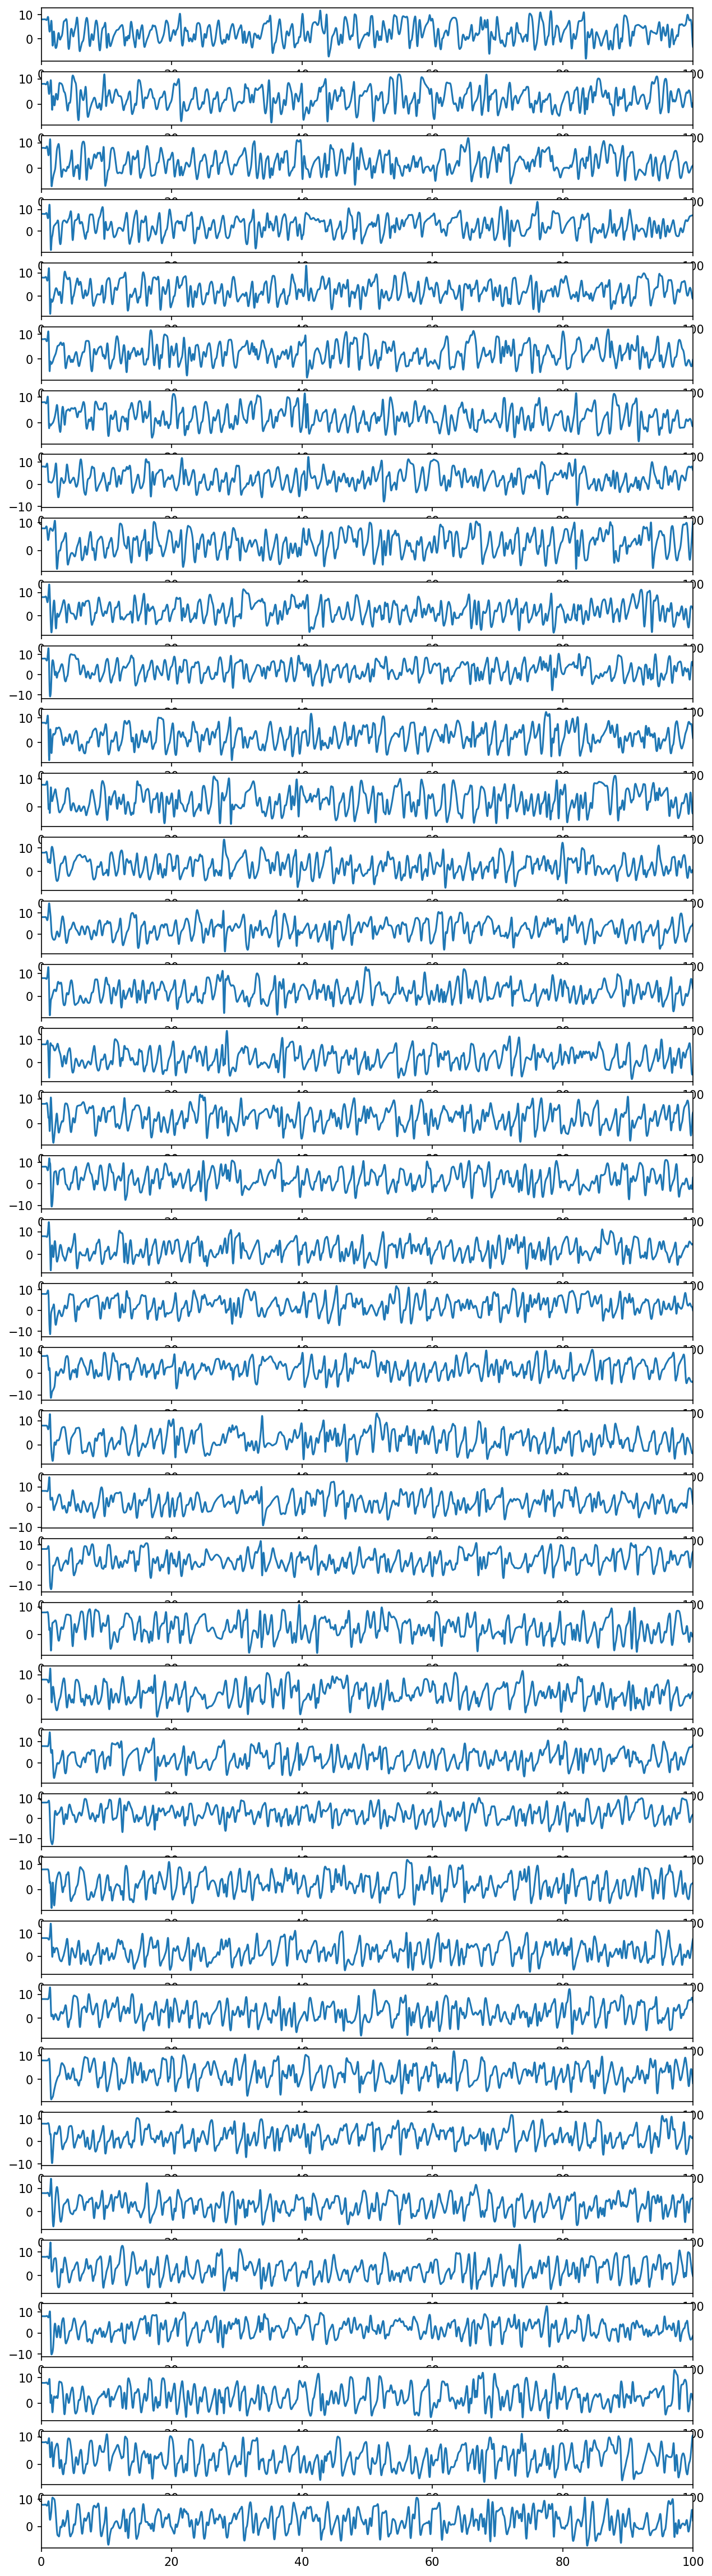

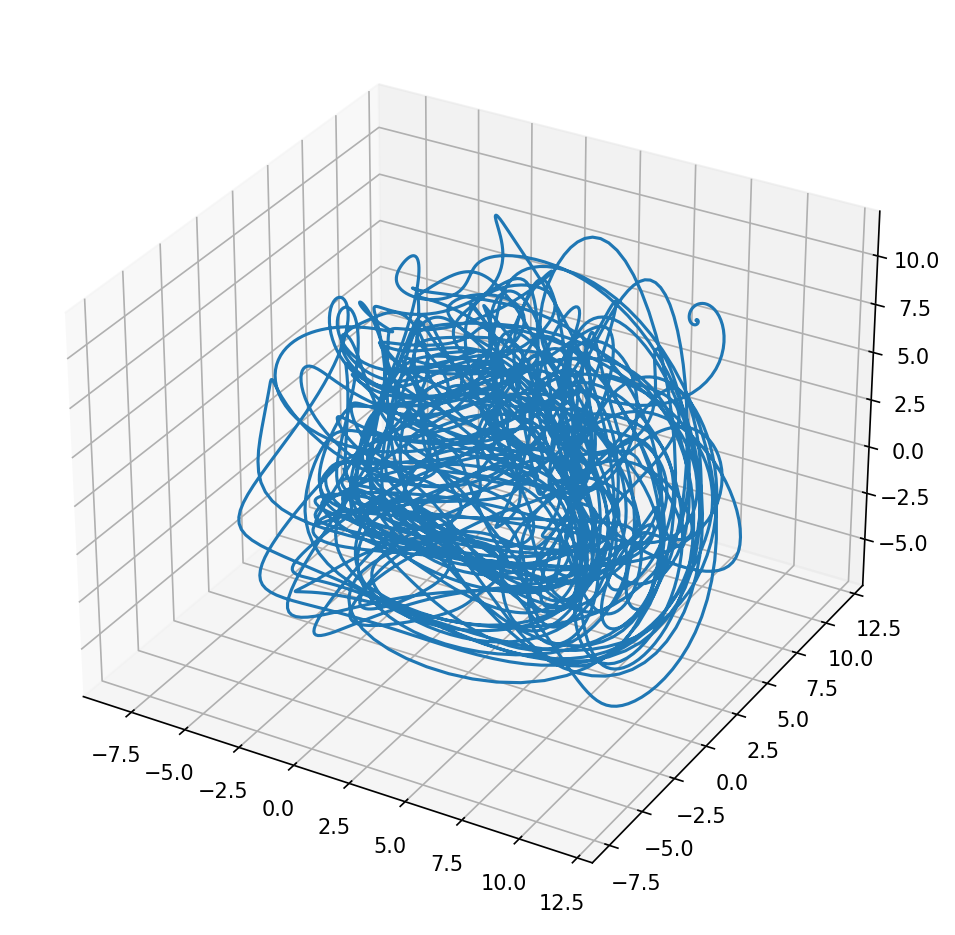

In [11]:
# Lorenz 1996

# Number of variables.
M = 40
# Number of iterations.
N = int(1e4)
# Time step.
h = 0.01
# Constants.
F = 8.

# Generate time array.
t = np.arange(0., N * h, h)
# Wwights for each Runge Kutta steps.
w = np.array( [1, 1, 1, 2] )
# Initial conditions.
x_0 = np.array( [F] * M )
x_0[0] = x_0[0] + 0.01
# Runge Kutta steps array.
X = np.array( [ [0.] * (w.shape[0] + 1) ] * M )
# Results array.
x = np.array( [ ( [i] + [0.0] * (N - 1) ) for i in x_0 ] )

# Iterate for every time step.
for i in range(N - 1):
    # Iterate for each Runge Kutta step.
    for j in range(w.shape[0]):
        # Generate the input variable for the Runge Kutta step.
        x_t = np.array ( [x[k, i] + h * X[k, j] * w[j] / 2 for k in range(M)] )
        # Calculate the Runge Kutta step.
        X[:, j + 1] = ( ( np.roll(x_t, -1) - np.roll(x_t, 2) )
            * np.roll(x_t, 1) - x_t + F )

    # Generate the result.
    x[:, i + 1] = ( x[:, i] + h / 6 * ( X[:, 1]
        + 2 * X[:, 2] + 2 * X[:, 3] + X[:, 4] ) )

# Plot
fig, axes = plt.subplots(M)
fig.set_facecolor("w")
fig.set_size_inches(10, M)
fig.set_dpi(150)

for i in range(len(axes)):
    axes[i].plot(t, x[i])
    axes[i].set_xlim(0, h * N)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_facecolor("w")
fig.set_size_inches(10, 8)
fig.set_dpi(150)

ax.plot(x[0], x[1], x[2])